In [13]:
import pandas as pd
import wfdb
import os
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.signal import find_peaks

In [24]:
# Caminho base onde está a pasta "ppg-database-but-ppg-2.0.0"
base_path = r"C:\Users\sebas\Downloads\brno"
data_folder = os.path.join(base_path, "ppg-database-but-ppg-2.0.0")

# 1. Ler os registos válidos com qualidade
quality_df = pd.read_csv(os.path.join(base_path, "quality-hr-ann.csv"))
quality_ppg_ids = [f"{int(id_)}_PPG" for id_ in quality_df[quality_df['Quality'] == 1]['ID'].values]

# 2. Ler os caminhos dos ficheiros PPG no RECORDS.txt
with open(os.path.join(base_path, "RECORDS.txt"), "r") as f:
    all_records = [line.strip() for line in f if line.strip().endswith("_PPG")]

# 3. Filtrar apenas os ficheiros PPG com qualidade
valid_records = [r for r in all_records if os.path.basename(r) in quality_ppg_ids]

# 4. Ler os ficheiros PPG e guardar os sinais
ppg_data = []

for record in valid_records:
    full_path = os.path.join(data_folder, record)
    try:
        signal, data = wfdb.rdsamp(full_path)
        values = signal.flatten()
        ppg_data.append(values)

    except Exception as e:
        print(f"Erro ao ler {record}: {e}")

# 5. Padding dos sinais para o mesmo tamanho, preencher com 0
max_len = max(len(s) for s in ppg_data)
ppg_padded = [np.pad(s, (0, max_len - len(s)), 'constant') for s in ppg_data]

# 6. Criar DataFrame e guardar
df = pd.DataFrame(ppg_padded)

# Exportar como CSV e Pickle

# Verifica se a pasta "files" existe, caso contrário cria
files_path = os.path.join(base_path, "files")
if not os.path.exists(files_path):
    os.makedirs(files_path)
    print(f"Criada a pasta: {files_path}")

# Guardar os ficheiros CSV e Pickle
date = datetime.now().strftime("%d-%m-%y_%H-%M")
csv_path = os.path.join(files_path, f"brno_ppg_{date}.csv")
pkl_path = os.path.join(files_path, f"brno_ppg_{date}.pkl")

df.to_csv(csv_path, index=False)
df.to_pickle(pkl_path)
print(f"\nTotal de registos guardados: {len(df)}")
print(f"Guardado como CSV: {csv_path}")
print(f"Guardado como Pickle: {pkl_path}")



Total de registos guardados: 830
Guardado como CSV: C:\Users\sebas\Downloads\brno\files\brno_ppg_18-04-25_20-03.csv
Guardado como Pickle: C:\Users\sebas\Downloads\brno\files\brno_ppg_18-04-25_20-03.pkl


In [5]:
file_path = r"C:\Users\sebas\Downloads\brno\files\brno_ppg_17-04-25_18-27.csv"
df = pd.read_csv(file_path)

# Encontrar os índices com excesso de zeros
linhas_muito_zeros1 = df[(df == 0).sum(axis=1) / df.shape[1] > 0.01].index.tolist()
linhas_muito_zeros2 = df[(df == 0).sum(axis=1) / df.shape[1] > 0.02].index.tolist()
linhas_muito_zeros5 = df[(df == 0).sum(axis=1) / df.shape[1] > 0.05].index.tolist()
linhas_muito_zeros10 = df[(df == 0).sum(axis=1) / df.shape[1] > 0.1].index.tolist()
linhas_muito_zeros20 = df[(df == 0).sum(axis=1) / df.shape[1] > 0.2].index.tolist()
linhas_muito_zeros30 = df[(df == 0).sum(axis=1) / df.shape[1] > 0.3].index.tolist()

print(f"Linhas com mais de 1% zeros: {len(linhas_muito_zeros1)}")
print(f"Linhas com mais de 2% zeros: {len(linhas_muito_zeros2)}")
print(f"Linhas com mais de 5% zeros: {len(linhas_muito_zeros5)}")
print(f"Linhas com mais de 10% zeros: {len(linhas_muito_zeros10)}")
print(f"Linhas com mais de 20% zeros: {len(linhas_muito_zeros20)}")
print(f"Linhas com mais de 30% zeros: {len(linhas_muito_zeros30)}")

print(f"Índices detetados: {linhas_muito_zeros1}")

Linhas com mais de 1% zeros: 51
Linhas com mais de 2% zeros: 51
Linhas com mais de 5% zeros: 51
Linhas com mais de 10% zeros: 51
Linhas com mais de 20% zeros: 43
Linhas com mais de 30% zeros: 39
Índices detetados: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 134, 199]


In [6]:
# Remove as linhas com os índices detetados
df_clean = df.drop(index=linhas_muito_zeros1)

# Reset do índice (DataFrame contínuo)
df_clean = df_clean.reset_index(drop=True)

# Mostrar resultado
print(f"Registos removidos: {len(linhas_muito_zeros1)}")
print(f"Registos restantes: {len(df_clean)}")


Registos removidos: 51
Registos restantes: 779


In [10]:
base_path = r"C:\Users\sebas\Downloads\brno"
files_path = os.path.join(base_path, "files")
date = datetime.now().strftime("%d-%m-%y_%H-%M")

csv_path = os.path.join(files_path, f"brno_ppg_clean_{date}.csv")
pkl_path = os.path.join(files_path, f"brno_ppg_{date}.pkl")
df_clean.to_csv(csv_path, index=False)
df_clean.to_pickle(pkl_path)
print(f"CSV limpo guardado em: {csv_path}")
print(f"Pickle limpo guardado em: {pkl_path}")

CSV limpo guardado em: C:\Users\sebas\Downloads\brno\files\brno_ppg_clean_22-04-25_12-08.csv
Pickle limpo guardado em: C:\Users\sebas\Downloads\brno\files\brno_ppg_22-04-25_12-08.pkl


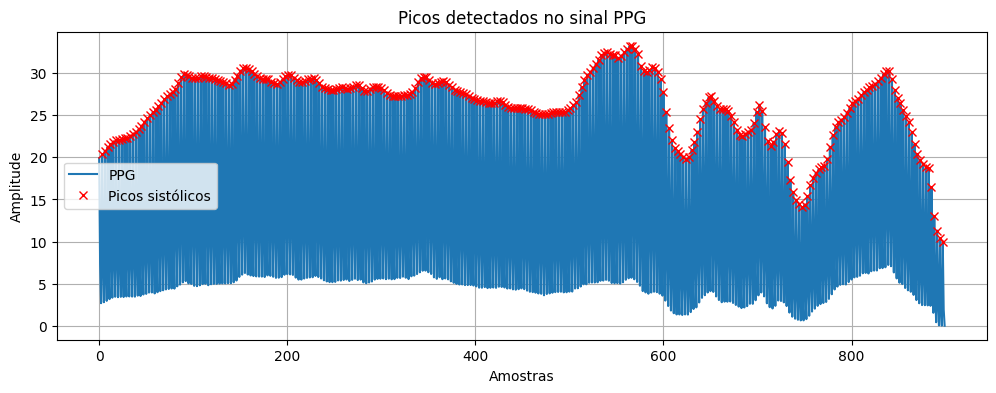

In [31]:
sinal = df_clean.iloc[30].values  # primeiro registo
# Detetar picos sistólicos
picos, _ = find_peaks(sinal, prominence=0.5)  # parâmetros ajustáveis

# Visualizar
plt.figure(figsize=(12, 4))
plt.plot(sinal, label="PPG")
plt.plot(picos, sinal[picos], "rx", label="Picos sistólicos")
plt.title("Picos detectados no sinal PPG")
plt.xlabel("Amostras")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

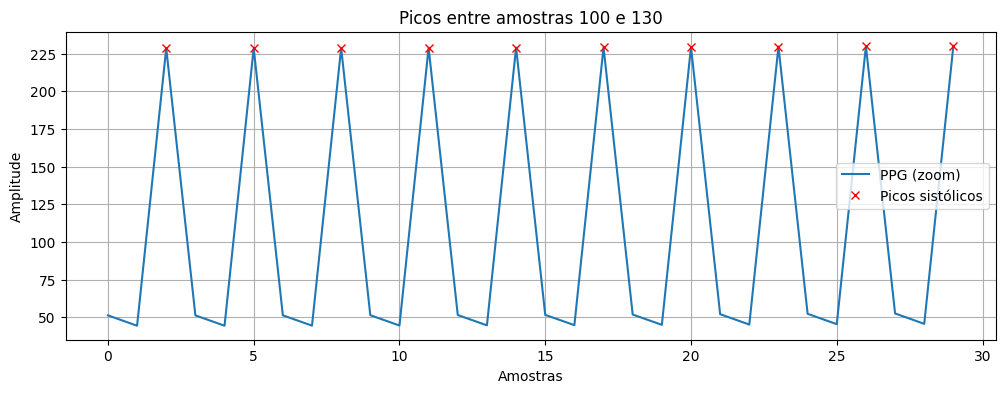

In [46]:
# Escolher intervalo para zoom
start = 100
end = 130

# Cortar o sinal e os picos
sinal_zoom = sinal[start:end]
picos_zoom = [pico - start for pico in picos if start <= pico < end]

# Plot
plt.figure(figsize=(12, 4))
plt.plot(sinal_zoom, label="PPG (zoom)")
plt.plot(picos_zoom, sinal_zoom[picos_zoom], "rx", label="Picos sistólicos")
plt.title(f"Picos entre amostras {start} e {end}")
plt.xlabel("Amostras")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()


In [34]:
intervalos = np.diff(picos)

# Calcular a média e o desvio padrão
media = np.mean(intervalos)
desvio_padrao = np.std(intervalos)
print(f"Média: {media:.2f} amostras")
print(f"Desvio padrão: {desvio_padrao:.2f} amostras")

Número de amostras entre picos consecutivos:
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3]
Média: 3.00 amostras
Desvio padrão: 0.00 amostras


In [39]:
medias_intervalos = []
desvios_intervalos = []

# Parâmetros do find_peaks
prominence = 0.5

# Loop pelos registos (linhas do DataFrame)
for idx, row in df_clean.iterrows():
    sinal = row.values

    # Detetar picos
    picos, _ = find_peaks(sinal, prominence=prominence)

    # Calcular intervalos entre picos
    if len(picos) >= 2:
        intervalos = np.diff(picos)
        medias_intervalos.append(np.mean(intervalos))
        desvios_intervalos.append(np.std(intervalos))
    else:
        # Se não houver pelo menos 2 picos, adiciona NaN
        medias_intervalos.append(np.nan)
        desvios_intervalos.append(np.nan)

# Mostrar os valores únicos e quantos casos de cada
print("Valores únicos de médias entre picos:", set(medias_intervalos))
print("Numero de casos de cada média:", {val: medias_intervalos.count(val) for val in set(medias_intervalos)})
print("Valores únicos de desvios padrão entre picos:", set(desvios_intervalos))
print("Numero de casos de cada desvio padrão:", {val: desvios_intervalos.count(val) for val in set(desvios_intervalos)})

Valores únicos de médias entre picos: {3.02027027027027, 3.0, 3.0305084745762714, 3.01010101010101}
Numero de casos de cada média: {3.02027027027027: 1, 3.0: 776, 3.0305084745762714: 1, 3.01010101010101: 1}
Valores únicos de desvios padrão entre picos: {0.0, 0.2457639659388272, 0.2317137785453969, 0.23903352658988344, 0.16384638410380808, 0.3009894627853982}
Numero de casos de cada desvio padrão: {0.0: 774, 0.2457639659388272: 1, 0.2317137785453969: 1, 0.23903352658988344: 1, 0.16384638410380808: 1, 0.3009894627853982: 1}


In [41]:
# Obter índices dos registos cuja média não é exatamente 3.0
indices_dp_diferentes = [i for i, m in enumerate(desvios_intervalos) if not np.isclose(m, 0)]

print("Índices dos registos com média diferente de 3.0:", indices_dp_diferentes)


Índices dos registos com média diferente de 3.0: [45, 83, 722, 723, 751]


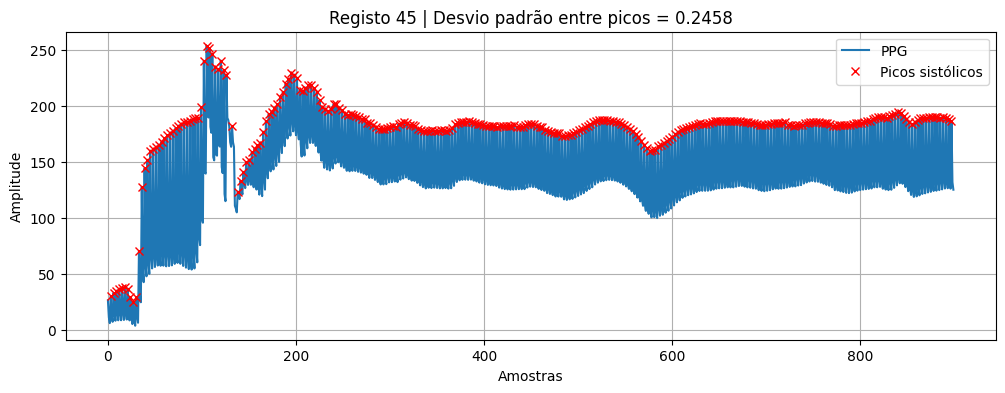

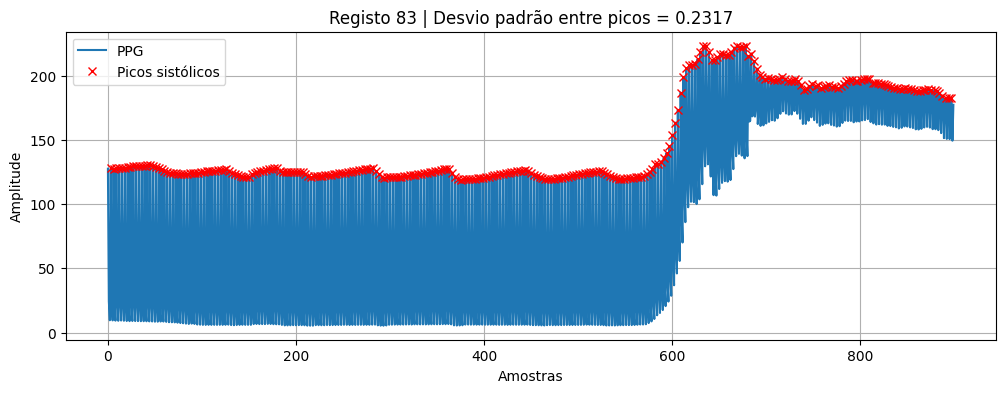

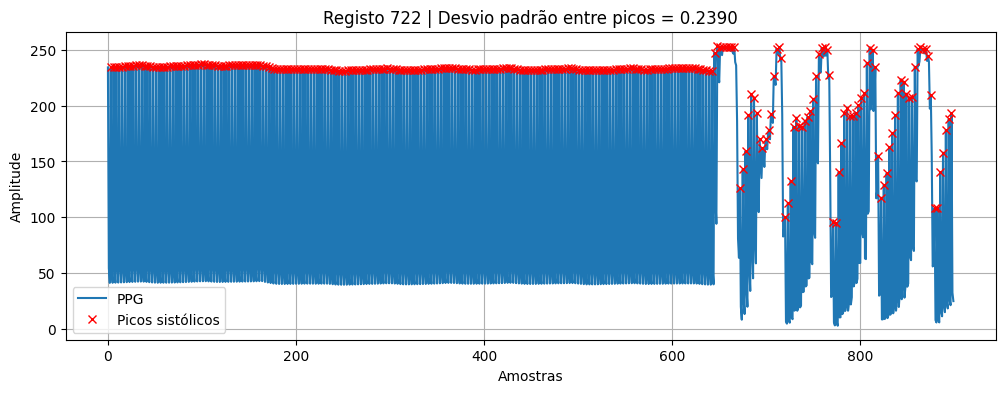

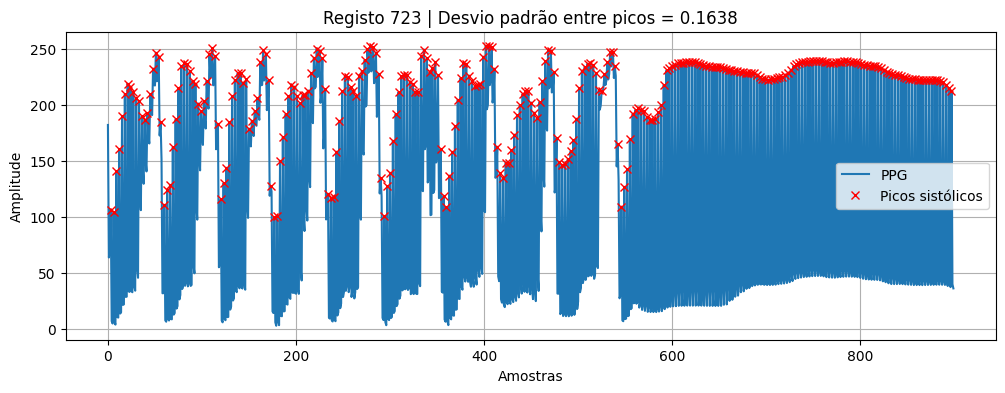

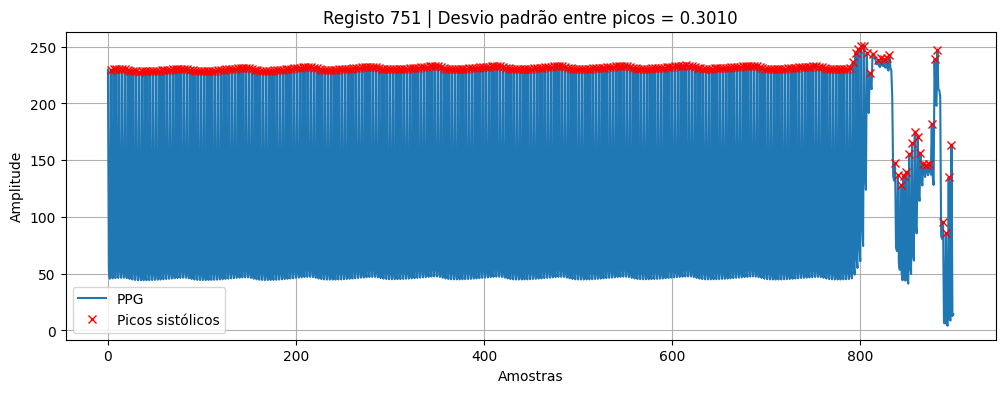

In [44]:
# Desenhar os gráficos
for i in indices_dp_diferentes:
    sinal = df_clean.iloc[i].values
    picos, _ = find_peaks(sinal, prominence=0.5)

    plt.figure(figsize=(12, 4))
    plt.plot(sinal, label="PPG")
    plt.plot(picos, sinal[picos], "rx", label="Picos sistólicos")
    plt.title(f"Registo {i} | Desvio padrão entre picos = {desvios_intervalos[i]:.4f}")
    plt.xlabel("Amostras")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)
    plt.show()